In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def set_random():
    tf.random.set_seed(42)
    np.random.seed(42)
    return None
set_random()


# Tensors and operations

### Tensors

In [2]:
#most common, 2x3 matrix 
t = tf.constant([[1.,2., 3.], [4., 5., 6.]])


In [3]:
#scalar
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

### Indexing 

In [4]:
#get the first of each array
t[:, :1]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [4.]], dtype=float32)>

In [5]:
#get all but the first of each array
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
#get only the first array
t[:1]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [7]:
#get all but the first array
t[1:]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[4., 5., 6.]], dtype=float32)>

In [8]:
#gt 2nd location in each array only
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

### Using Keras Backend

In [9]:
from tensorflow import keras 
k = keras.backend
#adds 10 to each location in within the array
k.square(k.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Converting to Numpy and back

In [10]:
a = np.array([2., 4., 5.])

In [11]:
#convert to tensorflow constant
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [12]:
#converting tf constant to numpy array
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

### Squaring with tf and numpy

In [13]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [14]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Dealing with conflicting types

In [15]:
try: 
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: add/


In [16]:
try: 
    tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/


In [17]:
t2 = tf.constant(40., dtype=tf.float64)
#use the cast method 
tf.constant(2.0) + tf.cast(t2, tf.float32)

#can also be done w/ numpy through assign method

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Working with strings

In [18]:
tf.constant(b'hello world')

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [19]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [20]:
#assigned values for the letters 
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [21]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit='UTF8_CHAR')

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [22]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays

In [23]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [24]:
#see the length of all the indexes
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [25]:
#decode all characters in each location of the array
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>

### Ragged Tensors
    (nested variable-length lists), good for non-uniform shapes 

In [26]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [27]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857]]>


In [28]:
# copies array to the end of array
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [29]:
#appends into the 2nd dimension of the arrays
r3 = tf.ragged.constant([[68, 69, 70],[71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71], [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [30]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [31]:
#change to tensor
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse Tensors

In [32]:
#indices mainly containing 0's
s = tf.SparseTensor(indices =[[0, 1], [1,0], [2,3]],
                   values=[1., 2., 3.],
                   dense_shape=[3, 4])
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [33]:
#conversion to dense
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [34]:
#multiplication of values
s2 = s * 2.0
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [35]:
try:
    s3 = s + 1
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [36]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
# multiples sparse tensor by dense matrix
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [37]:
s5 = tf.SparseTensor(indices=[[0, 2], [0,1]],
                    values=[1., 2.],
                    dense_shape=[3,4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [38]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [39]:
#to convert to dense array
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets


In [40]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])

In [41]:
#combine sets w/ only values in unique locations
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [42]:
#combine only unique values from each set
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [43]:
#combine only alike values in both sets
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

### Variables

In [44]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [45]:
#multiplication
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [46]:
#in the 0 index array, location 1 assign new value 42
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [47]:
#the last location of both arrays set to 0 and 1
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [48]:
try:
    v[1] = [7., 8., 9.]
except TypeError as ex:
    print(ex)

'ResourceVariable' object does not support item assignment


In [49]:
v.scatter_nd_update(indices=[[0,0], [1,2]],
                   updates=[100, 200])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [50]:
sparse_delta = tf.IndexedSlices( values= [[1., 2., 3.], [4., 5., 6.]],
                            indices=[1,0])
# reverse first dimension
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

### Tensor Arrays

In [51]:
#need decimal point for the float, otherwise tries to 
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 4.]))
array = array.write(2, tf.constant([5., 6.]))


In [52]:
#nulls the values of the location and reads them out
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>

In [53]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 6.]], dtype=float32)>

In [54]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.       , 2.6666667], dtype=float32)>

In [55]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 6.222223 ], dtype=float32)>

# Custom Loss Functions
    california housing data

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()


In [57]:
X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data, 
                                                             housing.target.reshape(-1, 1),
                                                             random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, Y_train_full, 
                                                     random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_valid_scaled = scaler.fit_transform(X_valid)
x_test_scaled = scaler.fit_transform(X_test)

### Huber Loss function

In [58]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

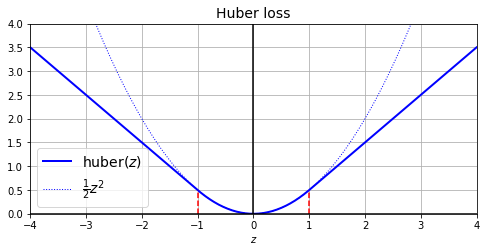

In [59]:
# PLOT IT 
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [60]:
#using the model in a simple one layer
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal', 
                      input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [61]:
model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 114us/sample - loss: 0.6247 - mae: 0.9969 - val_loss: 0.2505 - val_mae: 0.5660
Epoch 2/2
11610/11610 [==============================] - 1s 62us/sample - loss: 0.2193 - mae: 0.5176 - val_loss: 0.2148 - val_mae: 0.5166


### Saving the model with a custom object

In [62]:
#nothing special when saving, however...
model.save("model_with_cst_huber_loss.h5")

In [63]:
#when loading the model back, need to assign it to a variable
model = keras.models.load_model("model_with_cst_huber_loss.h5", 
                         custom_objects={"huber_fn": huber_fn})

In [64]:
model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 2s 147us/sample - loss: 0.2056 - mae: 0.4982 - val_loss: 0.2113 - val_mae: 0.5158
Epoch 2/2
11610/11610 [==============================] - 2s 171us/sample - loss: 0.2006 - mae: 0.4911 - val_loss: 0.2072 - val_mae: 0.5049


#### Modifiying the custom function to take open parameters

In [65]:
#functions allows the error size to be changed
def create_huber_fn(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [66]:
#running the model with huber_fn w/ threshold =2 
model.compile(loss=create_huber_fn(2.0), optimizer='nadam', metrics=['mae'])

In [67]:
model.fit(x_train_scaled, y_train, epochs=2, 
         validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 3s 297us/sample - loss: 0.2229 - mae: 0.4893 - val_loss: 0.2341 - val_mae: 0.5184
Epoch 2/2
11610/11610 [==============================] - 2s 149us/sample - loss: 0.2189 - mae: 0.4856 - val_loss: 0.2288 - val_mae: 0.5013


##### Saving the custom model with custom params

In [68]:
#again save as normal
model.save('model_with_custom_loss_threshold.h5')

In [69]:
#loading define the params, specify the threshold
model = keras.models.load_model('model_with_custom_loss_threshold.h5', 
                                custom_objects={'huber_fn': create_huber_fn(2.0)})

to save the current threshold, without having to declare it when loading the model, make a subclass of the keras.losses.loss class

In [70]:
#sublcass of keras.losses.loss class
class Huberloss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold 
        super().__init__(**kwargs)
        
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 /2
        return tf.where(is_small_error, squared_loss, linear_loss)
    #maintains the current config
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                      input_shape=input_shape),
    keras.layers.Dense(1),
])

In [72]:
model.compile(loss=Huberloss(2.0), optimizer='nadam', metrics=['mae'])
model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 4s 303us/sample - loss: 0.6934 - mae: 0.8818 - val_loss: 0.2609 - val_mae: 0.5345
Epoch 2/2
11610/11610 [==============================] - 2s 196us/sample - loss: 0.2402 - mae: 0.5077 - val_loss: 0.2378 - val_mae: 0.5172


In [73]:
#save model as norm
model.save('model_with_custom_loss_class.h5')

In [74]:
# problem 25956
# model = keras.models.load_model('model_with_custom_loss_class.h5',
#                                convert_custom_objects={'Huberloss': Huberloss})

## Other Custom Functions

In [75]:
#replicas
#example of custom activation function
def softplus_replicate(z):
    return tf.math.log(tf.exp(z) + 1.0)

def glort_init_replicate(shape, dtype=tf.float32):
    std_dev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev= std_dev, dtype=dtype)


def l1_regularizer_replicate(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def positive_weights_replicate(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)


In [76]:
custom_layer = keras.layers.Dense(1, activation=softplus_replicate, 
                          kernel_initializer=glort_init_replicate,
                          kernel_regularizer=l1_regularizer_replicate,
                          kernel_constraint=positive_weights_replicate)

In [77]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                    input_shape=input_shape),
    custom_layer
])

In [78]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [79]:
model.fit(x_train_scaled, y_train, epochs=2, validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 5s 395us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/2
11610/11610 [==============================] - 2s 191us/sample - loss: nan - mae: nan - val_loss: nan - val_mae: nan


In [80]:
model.save('model_saved_with_custom_parts.h5')

In [81]:
#loading the model with custom parts
model = keras.models.load_model('model_saved_with_custom_parts.h5',
                               custom_objects={
                                   #naming needs to be consistent
                                   'l1_regularizer_replicate': l1_regularizer_replicate,
                                   'glort_init_replicate': glort_init_replicate,
                                   'softplus_replicate': softplus_replicate,
                                   'positive_weights_replicate': positive_weights_replicate
                               })

#in demo lambda is called on positive weights, but gives an error when ran

In [82]:
# L1 Regularizer using the subclass build from keras

class Custom_l1_regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {'factor': self.factor}

In [83]:

standard_input_layer = keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal',
                                         input_shape=input_shape)


In [84]:


model = keras.models.Sequential([
    standard_input_layer,
    keras.layers.Dense(1, 
                      activation=softplus_replicate,
                      kernel_regularizer=Custom_l1_regularizer(0.01), 
                      kernel_constraint=positive_weights_replicate,
                      kernel_initializer=glort_init_replicate)
])



In [85]:
model.compile(loss='mse', optimizer='nadam', metrics=['mae'])

In [86]:
model.fit(x_train_scaled, y_train, epochs=2, 
          validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 4s 359us/sample - loss: 1.6339 - mae: 0.8887 - val_loss: 0.8485 - val_mae: 0.6216
Epoch 2/2
11610/11610 [==============================] - 2s 206us/sample - loss: 0.6739 - mae: 0.5454 - val_loss: 0.6463 - val_mae: 0.5506


In [87]:
#save model
model.save('custom_model_w_multi_custom_facets.h5')

In [88]:
#loading model
model = keras.models.load_model('custom_model_w_multi_custom_facets.h5',
                               custom_objects={
                                   'Custom_l1_regularizer':Custom_l1_regularizer,
                                   'glort_init_replicate': glort_init_replicate,
                                   'softplus_replicate': softplus_replicate,
                                   'positive_weights_replicate': positive_weights_replicate
                               })

# Custom Metrics

In [89]:
simple_model = keras.models.Sequential([
    standard_input_layer,
    keras.layers.Dense(1)
])

simple_model.compile(loss='mse', optimizer='nadam', metrics=[create_huber_fn(2.0)])

In [90]:
simple_model.fit(x_train_scaled, y_train, epochs=2, 
                validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 3s 293us/sample - loss: 1.5649 - huber_fn: 0.6999 - val_loss: 0.5690 - val_huber_fn: 0.2735
Epoch 2/2
11610/11610 [==============================] - 2s 167us/sample - loss: 0.5079 - huber_fn: 0.2448 - val_loss: 0.5112 - val_huber_fn: 0.2486


#### Warning:
       using the same fucntion for both loss and metrics will give different results, caused by floating point precision error. As well as other errors:
       - batch weighted mean is just mean of what the model has seen so far
       - ^ same for the weights, is just the mean of what has been seen so far

In [91]:
model.compile(loss=create_huber_fn(2.0), optimizer='nadam', metrics=[create_huber_fn(2.0)])

In [92]:
sample_weight = np.random.rand(len(y_train))

In [93]:
history = model.fit(x_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

W0501 13:35:01.055746 139787207567168 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 3s 278us/sample - loss: 0.1644 - huber_fn: 0.2391
Epoch 2/2
11610/11610 [==============================] - 2s 152us/sample - loss: 0.1523 - huber_fn: 0.2277


In [94]:
#example of the warning
history.history['loss'][0], history.history['huber_fn'][0] * sample_weight.mean()

(0.16444885539377074, 0.11864791044804247)

### Streaming metrics

In [95]:
precision = keras.metrics.Precision()


In [96]:
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [97]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [98]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>]

In [99]:
precision.reset_states()

### Custom Streaming Metric

In [100]:
class Huber_Metric(keras.metrics.Metric):
    
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) 
        self.threshold = threshold
        self.total = self.add_weight('total', initializer="zeros")
        self.count = self.add_weight('count', initializer="zeros")
        
    def huber_fn(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_error = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 /2
        return tf.where(is_small_error, squared_error, linear_loss)
    
    def update_state(self, y_true, y_pred, sample_weight = None):
        metric= self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
        
    def result(self):
        return self.total / self.count
    
    def get_confg(self):
        base_config = super().get_confg()
        return {**base_config, 'threshold': self.threshold}

In [101]:
# test 
m = Huber_Metric(2.0)

#total = 2 * |10 -2 | - 2^2/2 = 14
#count = 1
#result: 14/ 1 = 14
m(tf.constant([[2.0]]), tf.constant([[10.0]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [102]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [103]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [104]:
m.reset_states()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [105]:
#implmenting through a subclass 
simple_model.compile(loss=create_huber_fn(2.0), optimizer='nadam', metrics=[Huber_Metric(2.0)])

In [106]:
simple_model.fit(x_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 3s 241us/sample - loss: 0.2318 - huber__metric_1: 0.2318
Epoch 2/2
11610/11610 [==============================] - 2s 142us/sample - loss: 0.2243 - huber__metric_1: 0.2243


In [107]:
simple_model.save('model_with_custom_metrics.h5')
#unable to get the model to load although again

In [108]:
simple_model.metrics[0].threshold

2.0

better implementation of the huber metric that allows for more variety in shapes and weights

In [109]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name="HuberMetric", dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber_fn(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
        
    def get_confg(self):
        base_config = super().get_config()
        return {**base_config, 'threshold':self.threshold}

In [110]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='selu', kernel_initializer="lecun_normal", 
                      input_shape=input_shape),
    keras.layers.Dense(1)
])
model.compile(loss=keras.losses.Huber(2.0), optimizer='nadam',
             weighted_metrics=[HuberMetric(2.0)])

In [111]:
sample_weight = np.random.rand(len(y_train))
#getting an error of NoneType object not callable, reproduced on sample code
#history = model.fit(x_train_scaled, y_train, epochs=2, sample_weight=sample_weight)


# Custom Layers

In [112]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [113]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [114]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])

In [115]:
model.compile(loss='mse', optimizer='nadam')

In [116]:
model.fit(x_train_scaled, y_train, epochs=5, validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11610/11610 [==============================] - 3s 287us/sample - loss: 1.2222 - val_loss: 0.5991
Epoch 2/5
11610/11610 [==============================] - 2s 160us/sample - loss: 0.4667 - val_loss: 0.4775
Epoch 3/5
11610/11610 [==============================] - 2s 164us/sample - loss: 0.4109 - val_loss: 0.4524
Epoch 4/5
11610/11610 [==============================] - 2s 168us/sample - loss: 0.3903 - val_loss: 0.4396
Epoch 5/5
11610/11610 [==============================] - 2s 157us/sample - loss: 0.3753 - val_loss: 0.4548


In [117]:
model.evaluate(x_test_scaled, Y_test)

5160/5160 [==============================] - 1s 100us/sample - loss: 0.4164


0.41639613070229226

#### Custom class layer

In [118]:
class Custom_Dense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)
        
    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name='kernel', shape=[batch_input_shape[-1], self.units],
            initializer='glorot_normal')
        self.bias = self.add_weight(
            name='bias', shape=[self.units], initializer='zeros')
        super().build(batch_input_shape)   #req. at end
    
    def call(self, x):
        return self.activation(x @ self.kernel + self.bias)
    
    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])
    
    def get_config(self):
        base_config = super().get_config()
        return { **base_config, 'units': self.units, 
               'activation': keras.activations.serialize(self.activation)}

In [119]:
model = keras.models.Sequential([
    Custom_Dense(30, activation='relu', input_shape=input_shape),
    Custom_Dense(1)
])

model.compile(loss='mse', optimizer='nadam')

In [120]:
model.fit(x_train_scaled, y_train, epochs=2, 
          validation_data=(x_valid_scaled, y_valid))



Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 3s 250us/sample - loss: 2.6164 - val_loss: 0.8713
Epoch 2/2
11610/11610 [==============================] - 2s 166us/sample - loss: 0.7014 - val_loss: 0.6294


In [121]:
model.evaluate(x_test_scaled, Y_test)

5160/5160 [==============================] - 0s 89us/sample - loss: 0.5456


0.5456490943598192

In [122]:
model.save('custom_layer_model.h5')

In [123]:
model = keras.models.load_model('custom_layer_model.h5', custom_objects={
    "Custom_Dense": Custom_Dense
})

## Custom multi-layer class

In [124]:
class Multi_Layer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        return X1 + X2, X1 * X2
    
    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

In [125]:
input_1 = keras.layers.Input(shape=[2])
input_2 = keras.layers.Input(shape=[2])
outputs1, output2 = Multi_Layer()((input_1, input_2))

### Adding Gaussian Noise to custom layer

In [126]:
class Add_Guassian_Noise(keras.layers.Layer):
    
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev
        
    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X
        
    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [127]:
model.compile(loss='mse', optimizer='nadam')

In [128]:
model.fit(x_train_scaled, y_train, epochs=2, 
        validation_data=(x_valid_scaled, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 3s 241us/sample - loss: 0.4852 - val_loss: 0.4902
Epoch 2/2
11610/11610 [==============================] - 2s 165us/sample - loss: 0.4161 - val_loss: 0.4504


In [129]:
model.evaluate(x_test_scaled, Y_test)

5160/5160 [==============================] - 0s 84us/sample - loss: 0.4118


0.4117879684812339

### Custom Model

In [130]:
x_new_scaled = x_test_scaled

In [131]:
class Residual_Block(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        self.n_layers = n_layers
        self.n_neurons = n_neurons
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation='elu', 
                                          kernel_initializer='he_normal')
                      for _ in range(n_layers)]
        
    def call(self, inputs):
        z = inputs
        for layer in self.hidden:
            z = layer(z)
        return inputs + z
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config,  
               'n_layers': self.n_layers, 
               'n_neurons': self.n_neurons}

In [132]:
class Residual_Regressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.output_dim = output_dim
        self.hidden1 = keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal')
        
        self.block1 = Residual_Block(2, 30)
        self.block2 = Residual_Block(2, 30)
        self.out = keras.layers.Dense(output_dim)
        
    def call(self, inputs):
        z = self.hidden1(inputs)
        for _ in range(1 +3):
            z = self.block1(z)
            return self.out(z)
        
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 
               "output_dim": self.output_dim}

In [133]:
model = Residual_Regressor(1)
model.compile(loss='mse', optimizer='nadam')

In [134]:
history = model.fit(x_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 287us/sample - loss: 1.1566
Epoch 2/5
11610/11610 [==============================] - 2s 177us/sample - loss: 0.4667
Epoch 3/5
11610/11610 [==============================] - 2s 169us/sample - loss: 0.4104
Epoch 4/5
11610/11610 [==============================] - 2s 153us/sample - loss: 0.3928
Epoch 5/5
11610/11610 [==============================] - 2s 163us/sample - loss: 0.3790


In [135]:
score = model.evaluate(x_test_scaled, Y_test)
y_pred = model.predict(x_new_scaled)

5160/5160 [==============================] - 1s 126us/sample - loss: 0.4473


In [136]:
#saving custom model requires ckpt file type
model.save('Custom_model.ckpt')

W0501 13:35:50.412147 139787207567168 save_impl.py:90] Skipping full serialization of Keras layer <__main__.Residual_Block object at 0x7f21c64cf6d8>, because it is not built.
W0501 13:35:50.828134 139787207567168 save_impl.py:90] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Dense object at 0x7f21c64cf4e0>, because it is not built.
W0501 13:35:50.829731 139787207567168 save_impl.py:90] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Dense object at 0x7f21c64cf9b0>, because it is not built.
W0501 13:35:51.015313 139787207567168 deprecation.py:506] From /media/tim/Primary Storage/projects/machine_learning/ml_env/local/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint argu

In [137]:
model = keras.models.load_model('Custom_model.ckpt')

In [138]:
history = model.fit(x_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 290us/sample - loss: 0.3814
Epoch 2/5
11610/11610 [==============================] - 2s 165us/sample - loss: 0.3610
Epoch 3/5
11610/11610 [==============================] - 2s 158us/sample - loss: 0.4043
Epoch 4/5
11610/11610 [==============================] - 2s 163us/sample - loss: 0.3693
Epoch 5/5
11610/11610 [==============================] - 2s 168us/sample - loss: 0.4053


### defining the custom model using sequential api

In [139]:
block1 = Residual_Block(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal'),
                      block1, block1, block1, block1, block1,
                    keras.layers.Dense(1)
])

In [140]:
model.compile(loss='mse', optimizer='nadam')


In [141]:
history = model.fit(x_train_scaled, y_train, epochs=5)
score = model.evaluate(x_test_scaled, Y_test)

y_pred = model.predict(x_new_scaled)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 3s 273us/sample - loss: 1.0089
Epoch 2/5
11610/11610 [==============================] - 2s 156us/sample - loss: 0.4475
Epoch 3/5
11610/11610 [==============================] - 2s 179us/sample - loss: 0.3910
Epoch 4/5
11610/11610 [==============================] - 2s 176us/sample - loss: 0.3871
Epoch 5/5
5160/5160 [==============================] - 1s 139us/sample - loss: 0.3841


# Losses and Metrics based on model internals

In [142]:
class Reconstructing_Regressor(keras.models.Model):
    
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation='selu',
                                         kernel_initializer='lecun_normal')
                      for _ in range (5)]
        self.out = keras.layers.Dense(output_dim)
    #issue tensorflow 26260
        
    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)
        super().build(batch_input_shape)
        
    def call(self, inputs, training=None):
        z = inputs
        for layer in self.hidden:
            z = layer(z)
            
        reconstruction = self.reconstruct(z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
                      
        return self.out(z)

In [143]:
model = Reconstructing_Regressor(1)
model.compile(loss='mse', optimizer='nadam')

history = model.fit(x_train_scaled, y_train, epochs=2)

Train on 11610 samples
Epoch 1/2
11610/11610 [==============================] - 5s 426us/sample - loss: 0.7044
Epoch 2/2
11610/11610 [==============================] - 2s 192us/sample - loss: 0.4049


In [144]:
model.evaluate(x_test_scaled, Y_test)

5160/5160 [==============================] - 1s 148us/sample - loss: 0.3770


0.3769666276467863

## Computing Gradients with Autodiff

In [145]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [146]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [147]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [148]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)

with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [149]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [150]:
#will only go through the recorded computations once (in reverse order)
#tape is automatically removed after gradient is called
with tf.GradientTape() as tape:
    z = f(w1, w2)
    
dz_dw1 = tape.gradient(z, w1)

try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

GradientTape.gradient can only be called once on non-persistent tapes.


In [151]:
#working with the tape persistently
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2) 
del tape

In [152]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [153]:
#tape will only track operations that involve variables, thus a constant will not work
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)
    
gradients = tape.gradient(z, [c1, c2])
gradients 

[None, None]

You can force gradient tape to watch tesnors thou

In [154]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)
    
gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

##### computing the individual gradients in regard to model's parameters

In [155]:
with tf.GradientTape(persistent=True) as hessian_tape:
    with tf.GradientTape() as jacobian_tape:
        z = f(w1, w2)
    jacobians = jacobian_tape.gradient(z, [w1, w2])
 # second order partial derivatives  (not typically needed)   
hessian = [hessian_tape.gradient(x, [w1, w2])
          for x in jacobians]
del hessian_tape

In [156]:
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [157]:
hessian

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

#### Stopping gradients from backproagating through some part of the NN

In [158]:

def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [159]:
#example with softplus, pg 401
x = tf.Variable(100.)

with tf.GradientTape() as tape:
    z = softplus_replicate(x)
    
tape.gradient(z, [x])   #not reproducing the id, however

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [160]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [161]:
#computes the gradients, returns both normal output and function that computes derivatives
@tf.custom_gradient
def improved_softplus(z):
    exp = tf.exp(z)
    def softplus_gradients(grad):
        return grad / (1 + 1 / exp)
    return tf.math.log(exp + 1, softplus_gradients)

#main output will still 'explode' bc of the exponential, workaround use: tf.where

In [162]:
#usage of tf.where to solve exploding
def improved_softplus(z):
    return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1))

In [163]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = improved_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])

# computing gradients w/ autodiff

In [164]:
l2_reg = keras.regularizers.l2(0.05)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='elu', kernel_initializer='he_normal',
                      kernel_regularizer=l2_reg), 
    keras.layers.Dense(1, kernel_regularizer=l2_reg)
])


In [165]:
def random_batch(x, y, batch_size=32):
    idx = np.random.randint(len(x), size= batch_size)
    return x[idx], y[idx]

In [166]:
def print_status_bar(iteration, total, loss, metrics=None):
    metrics = ' - '.join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    
    end = "" if iteration < total else "\n"
    print("\r{}/{} - ".format(iteration, total) + metrics, end=end)

In [167]:
import time 

mean_loss = keras.metrics.Mean(name='loss')
mean_square = keras.metrics.Mean(name="mean_square")

for i in range(1, 50, + 1):
    loss = 1 /i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

49/50 - loss: 0.0914 - mean_square: 825.0000

'prettier' w/ progress bar

In [168]:
def progress_bar(iteration, total, size=30):
    running = iteration < total
    c = ">" if running else "="
    p = (size - 1) * iteration // total
    fmt = "{{:-{}d}}/{{}} [{{}}]".format(len(str(total)))
    params = [iteration, total, "=" * p + c + "." * (size - p - 1)]
    return fmt.format(*params)

In [169]:
def print_status_bar(iteration, total, loss, metrics=None, size=30):
    metrics = " - ".join(["{}: {:.4f}".format(m.name, m.result())
                         for m in [loss] + (metrics or [])])
    end = "" if iteration < total else "\n"
    print("\r{} - {}".format(progress_bar(iteration, total), metrics), end=end)

In [170]:
mean_loss = keras.metrics.Mean(name="loss")
mean_square = keras.metrics.Mean(name="mean_square")
for i in range(1, 50 + 1):
    loss = 1 / i
    mean_loss(loss)
    mean_square(i ** 2)
    print_status_bar(i, 50, mean_loss, [mean_square])
    time.sleep(0.05)

50/50 [==============================] - loss: 0.0900 - mean_square: 858.5000


## Custom Loop

In [171]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = keras.optimizers.Nadam(lr=0.01)
loss_fn = keras.losses.mean_squared_error
mean_loss = keras.metrics.Mean()
metrics = [keras.metrics.MeanAbsoluteError()]

pg 404, for indepth walk through

In [172]:
for epoch in range(1, n_epochs + 1):
    print("Epoch {}/{}".format(epoch, n_epochs))
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(x_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step * batch_size, len(y_train), mean_loss, metrics)
    print_status_bar(len(y_train), len(y_train), mean_loss, metrics)
    for metric in [mean_loss] + metrics:
        metric.reset_states()

W0501 13:36:30.407275 139787207567168 base_layer.py:1790] Layer dense_29 is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/5
11610/11610 [==============================] - mean: 1.4578 - mean_absolute_error: 0.5861
Epoch 2/5
11610/11610 [==============================] - mean: 0.6600 - mean_absolute_error: 0.5273
Epoch 3/5
11610/11610 [==============================] - mean: 0.6538 - mean_absolute_error: 0.5264
Epoch 4/5
11610/11610 [==============================] - mean: 0.6593 - mean_absolute_error: 0.5257
Epoch 5/5
11610/11610 [==============================] - mean: 0.6301 - mean_absolute_error: 0.5146


### Improved Custom Loop

In [174]:
try:
    from tqdm import tnrange
    from collections import OrderedDict
    with tnrange(1, n_epochs + 1, desc="All epochs") as epochs:
        for epoch in epochs:
            with tnrange(1, n_steps + 1, desc="Epoch {}/{}".format(epoch, n_epochs)) as steps:
                for step in steps:
                    X_batch, y_batch = random_batch(x_train_scaled, y_train)
                    with tf.GradientTape() as tape:
                        y_pred = model(X_batch)
                        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
                        loss = tf.add_n([main_loss] + model.losses)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    for variable in model.variables:
                        if variable.constraint is not None:
                            variable.assign(variable.constraint(variable))                    
                    status = OrderedDict()
                    mean_loss(loss)
                    status["loss"] = mean_loss.result().numpy()
                    for metric in metrics:
                        metric(y_batch, y_pred)
                        status[metric.name] = metric.result().numpy()
                    steps.set_postfix(status)
            for metric in [mean_loss] + metrics:
                metric.reset_states()
except ImportError as ex:
    print("To run this cell, please install tqdm, ipywidgets and restart Jupyter")

/media/tim/Primary Storage/projects/machine_learning/ml_env/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  after removing the cwd from sys.path.


/media/tim/Primary Storage/projects/machine_learning/ml_env/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  


### Tensorflow  functions and graphs

In [175]:
def cube(x):
    return x ** 3

In [176]:
cube(2)

8

In [177]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [179]:
#convert function into tf function
tf_cube = tf.function(cube)
tf_cube

In [180]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

#### Tf Functions and Concrete Functions

In [181]:
concrete_fn = tf_cube.get_concrete_function(tf.constant(2.0))
concrete_fn.graph

In [182]:
concrete_fn(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [184]:
concrete_fn is tf_cube.get_concrete_function(tf.constant(2.0))

True

### function defs and graphs

In [186]:
ops = concrete_fn.graph.get_operations()
ops

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'Identity' type=Identity>]

In [187]:
pow_op = ops[2]
list(pow_op.inputs)

[<tf.Tensor 'x:0' shape=() dtype=float32>,
 <tf.Tensor 'pow/y:0' shape=() dtype=float32>]

In [188]:
pow_op.outputs

[<tf.Tensor 'pow:0' shape=() dtype=float32>]

In [190]:
concrete_fn.graph.get_operation_by_name('x')

<tf.Operation 'x' type=Placeholder>

In [191]:
concrete_fn.graph.get_tensor_by_name('Identity:0')

<tf.Tensor 'Identity:0' shape=() dtype=float32>

In [192]:
concrete_fn.function_def.signature

name: "__inference_cube_983499"
input_arg {
  name: "x"
  type: DT_FLOAT
}
output_arg {
  name: "identity"
  type: DT_FLOAT
}

### Tracing tf fn's to python fn's for computation graph

In [194]:
@tf.function
def tf_cube(x):
    print("print:", x)
    return x ** 3

In [195]:
result = tf_cube(tf.constant(2.0))

print: Tensor("x:0", shape=(), dtype=float32)


In [196]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [197]:
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]])) # New shape: trace!
result = tf_cube(tf.constant([[3., 4.], [5., 6.]])) # New shape: trace!
result = tf_cube(tf.constant([[7., 8.], [9., 10.], [11., 12.]])) # no trace

W0501 13:55:55.468075 139787207567168 def_function.py:586] 5 out of the last 5 calls to <function tf_cube at 0x7f21c61ea268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.
W0501 13:55:55.474308 139787207567168 def_function.py:586] 6 out of the last 6 calls to <function tf_cube at 0x7f21c61ea268> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to 

print: 2
print: 3
print: Tensor("x:0", shape=(1, 2), dtype=float32)
print: Tensor("x:0", shape=(2, 2), dtype=float32)
print: Tensor("x:0", shape=(3, 2), dtype=float32)


In [198]:
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2] # drop half the rows and columns

In [199]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1) # Traces the function.
preprocessed_images = shrink(img_batch_2) # Reuses the same concrete function.

Tracing Tensor("images:0", shape=(None, 28, 28), dtype=float32)


In [200]:
img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
try:
    preprocessed_images = shrink(img_batch_3)  # rejects unexpected types or shapes
except ValueError as ex:
    print(ex)

Python inputs incompatible with input_signature:
  inputs: (
    tf.Tensor(
[[[0.6234981  0.9465004 ]
  [0.6747534  0.34780383]]

 [[0.66588044 0.76424825]
  [0.80313575 0.02245963]]], shape=(2, 2, 2), dtype=float32))
  input_signature: (
    TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None))


### Autograph for control flow

In [204]:
#static loop
@tf.function
def add_10(x):
    for i in range(10):
        x += 1
    return x

In [202]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [203]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'add/y' type=Const>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'add_1/y' type=Const>,
 <tf.Operation 'add_1' type=AddV2>,
 <tf.Operation 'add_2/y' type=Const>,
 <tf.Operation 'add_2' type=AddV2>,
 <tf.Operation 'add_3/y' type=Const>,
 <tf.Operation 'add_3' type=AddV2>,
 <tf.Operation 'add_4/y' type=Const>,
 <tf.Operation 'add_4' type=AddV2>,
 <tf.Operation 'add_5/y' type=Const>,
 <tf.Operation 'add_5' type=AddV2>,
 <tf.Operation 'add_6/y' type=Const>,
 <tf.Operation 'add_6' type=AddV2>,
 <tf.Operation 'add_7/y' type=Const>,
 <tf.Operation 'add_7' type=AddV2>,
 <tf.Operation 'add_8/y' type=Const>,
 <tf.Operation 'add_8' type=AddV2>,
 <tf.Operation 'add_9/y' type=Const>,
 <tf.Operation 'add_9' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [205]:
#dynamic loop
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x

In [206]:
add_10(tf.constant(5))

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [207]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [208]:
#dynamic loop w/ autograph
@tf.function
def add_10(x):
    for i in tf.range(10):
        x = x + 1
    return x

In [209]:
add_10.get_concrete_function(tf.constant(0)).graph.get_operations()

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'range/start' type=Const>,
 <tf.Operation 'range/limit' type=Const>,
 <tf.Operation 'range/delta' type=Const>,
 <tf.Operation 'range' type=Range>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

### Dealing with variables and misc. resources w/ tf functions

In [210]:
counter = tf.Variable(0)

@tf.function
def increment(counter, c=1):
    return counter.assign_add(c)

In [211]:
increment(counter)
increment(counter)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [212]:
function_def = increment.get_concrete_function(counter).function_def
function_def.signature.input_arg[0]

name: "counter"
type: DT_RESOURCE

In [213]:
counter = tf.Variable(0)

@tf.function
def increment(c=1):
    return counter.assign_add(c)

In [214]:
increment()
increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [215]:
function_def = increment.get_concrete_function().function_def
function_def.signature.input_arg[0]

name: "assignaddvariableop_resource"
type: DT_RESOURCE

In [216]:
class Counter:
    def __init__(self):
        self.counter = tf.Variable(0)

    @tf.function
    def increment(self, c=1):
        return self.counter.assign_add(c)

In [217]:
c = Counter()
c.increment()
c.increment()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [218]:
@tf.function
def add_10(x):
    for i in tf.range(10):
        x += 1
    return x

tf.autograph.to_code(add_10.python_function)

"def tf__add_10(x):\n  do_return = False\n  retval_ = ag__.UndefinedReturnValue()\n  with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n\n    def get_state():\n      return ()\n\n    def set_state(_):\n      pass\n\n    def loop_body(iterates, x):\n      i = iterates\n      x += 1\n      return x,\n    x, = ag__.for_stmt(ag__.converted_call(tf.range, (10,), None, fscope), None, loop_body, get_state, set_state, (x,), ('x',), ())\n    do_return = True\n    retval_ = fscope.mark_return_value(x)\n  do_return,\n  return ag__.retval(retval_)\n"

In [219]:
def display_tf_code(func):
    from IPython.display import display, Markdown
    if hasattr(func, "python_function"):
        func = func.python_function
    code = tf.autograph.to_code(func)
    display(Markdown('```python\n{}\n```'.format(code)))

## tf functions w/ tf.keras

In [220]:
# Custom loss function
def my_mse(y_true, y_pred):
    print("Tracing loss my_mse()")
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [221]:
# Custom metric function
def my_mae(y_true, y_pred):
    print("Tracing metric my_mae()")
    return tf.reduce_mean(tf.abs(y_pred - y_true))


In [222]:
# Custom layer
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer='uniform',
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super().build(input_shape)

    def call(self, X):
        print("Tracing MyDense.call()")
        return self.activation(X @ self.kernel + self.biases)

In [223]:
# Custom model
class MyModel(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = MyDense(30, activation="relu")
        self.hidden2 = MyDense(30, activation="relu")
        self.output_ = MyDense(1)

    def call(self, input):
        print("Tracing MyModel.call()")
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_(concat)
        return output

model = MyModel()

In [225]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [231]:
model.fit(x_train_scaled, y_train, epochs=2,
          validation_data=(x_valid_scaled, y_valid))
model.evaluate(x_test_scaled, Y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4228 - my_mae: 0.4634 - val_loss: 0.4629 - val_my_mae: 0.4992
Epoch 2/2
5160/5160 [==============================] - 0s 20us/sample - loss: 0.4044 - my_mae: 0.4587


[0.4044472819843958, 0.4587218]

In [233]:
model = MyModel(dynamic=True)
#to turn off the iterations 

In [234]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae])

In [236]:
model.fit(x_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(x_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(x_test_scaled[:64], Y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.625393867492676, 2.0625315]

In [237]:
#to run eagerly
model = MyModel()

In [238]:
model.compile(loss=my_mse, optimizer="nadam", metrics=[my_mae], run_eagerly=True)

In [239]:
model.fit(x_train_scaled[:64], y_train[:64], epochs=1,
          validation_data=(x_valid_scaled[:64], y_valid[:64]), verbose=0)
model.evaluate(x_test_scaled[:64], Y_test[:64], verbose=0)

Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()
Tracing MyModel.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing MyDense.call()
Tracing loss my_mse()
Tracing metric my_mae()


[5.571150302886963, 2.0671072]

### custom optimizers

In [240]:
class MyMomentumOptimizer(keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.9, name="MyMomentumOptimizer", **kwargs):
        """Call super().__init__() and use _set_hyper() to store hyperparameters"""
        super().__init__(name, **kwargs)
        self._set_hyper("learning_rate", kwargs.get("lr", learning_rate)) # handle lr=learning_rate
        self._set_hyper("decay", self._initial_decay) # 
        self._set_hyper("momentum", momentum)
    
    def _create_slots(self, var_list):
        """For each model variable, create the optimizer variable associated with it.
        TensorFlow calls these optimizer variables "slots".
        For momentum optimization, we need one momentum slot per model variable.
        """
        for var in var_list:
            self.add_slot(var, "momentum")

    @tf.function
    def _resource_apply_dense(self, grad, var):
        """Update the slots and perform one optimization step for one model variable
        """
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype) # handle learning rate decay
        momentum_var = self.get_slot(var, "momentum")
        momentum_hyper = self._get_hyper("momentum", var_dtype)
        momentum_var.assign(momentum_var * momentum_hyper - (1. - momentum_hyper)* grad)
        var.assign_add(momentum_var * lr_t)

    def _resource_apply_sparse(self, grad, var):
        raise NotImplementedError

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter("learning_rate"),
            "decay": self._serialize_hyperparameter("decay"),
            "momentum": self._serialize_hyperparameter("momentum"),
        }

In [242]:
model = keras.models.Sequential([keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=MyMomentumOptimizer())
model.fit(x_train_scaled, y_train, epochs=5)

Train on 11610 samples
Epoch 1/5
11610/11610 [==============================] - 1s 67us/sample - loss: 5.1151
Epoch 2/5
11610/11610 [==============================] - 1s 45us/sample - loss: 1.6276
Epoch 3/5
11610/11610 [==============================] - 1s 49us/sample - loss: 0.8834
Epoch 4/5
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6956
Epoch 5/5
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6378
